C:\Users\anves\AppData\Roaming\Python\Python37\site-packages\mlxtend\frequent_patterns\fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


✅ Frequent itemsets found: 35856
   support                    itemsets
0   0.2548             (Gender_Female)
1   0.2540               (Gender_Male)
2   0.2428         (Gender_Non-binary)
3   0.2484  (Gender_Prefer not to say)
4   0.3298      (Work_Location_Hybrid)
✅ All rules generated: 8054
                  antecedents                              consequents  \
0             (Gender_Female)   (Access_to_Mental_Health_Resources_No)   
1               (Gender_Male)   (Access_to_Mental_Health_Resources_No)   
2         (Gender_Non-binary)   (Access_to_Mental_Health_Resources_No)   
3  (Gender_Prefer not to say)  (Access_to_Mental_Health_Resources_Yes)   
4      (Work_Location_Hybrid)   (Access_to_Mental_Health_Resources_No)   

   support  confidence      lift  
0   0.1326    0.520408  1.019209  
1   0.1300    0.511811  1.002372  
2   0.1250    0.514827  1.008279  
3   0.1254    0.504831  1.031530  
4   0.1674    0.507580  0.994086  
✅ Filtered mental health rules: 0
Empty DataFrame


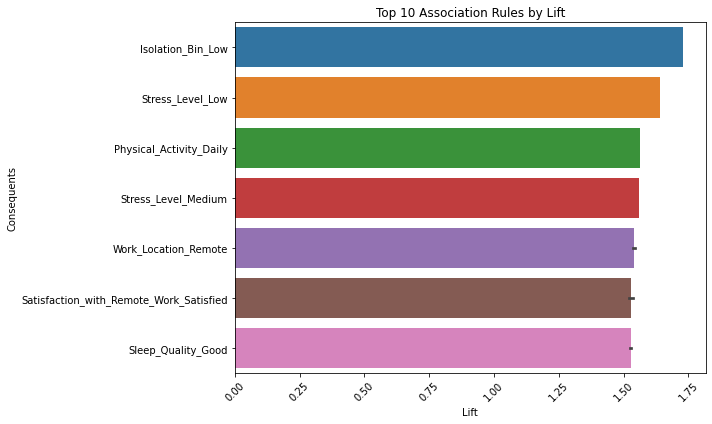


🧾 Final Rule Summary:
                                            antecedents  \
7266  (Gender_Prefer not to say, Age_Group_46-60, Ba...   
7256  (Gender_Male, Age_Group_46-60, Isolation_Bin_L...   
1283  (Gender_Female, Sleep_Quality_Average, Hours_B...   
7268  (Gender_Prefer not to say, Age_Group_46-60, Ba...   
7577  (Sleep_Quality_Good, Satisfaction_with_Remote_...   
7328  (Work_Location_Hybrid, Hours_Bin_<30, Access_t...   
2177  (Gender_Prefer not to say, Age_Group_18-30, Ba...   
7576  (Work_Location_Remote, Satisfaction_with_Remot...   
8010  (Satisfaction_with_Remote_Work_Unsatisfied, Is...   
7306  (Work_Location_Hybrid, Sleep_Quality_Good, Str...   

                                    consequents  support  confidence      lift  
7266                        (Isolation_Bin_Low)   0.0102    0.698630  1.730139  
7256                         (Stress_Level_Low)   0.0108    0.540000  1.641337  
1283                  (Physical_Activity_Daily)   0.0106    0.504762  1.561763  
726

In [12]:
# Install if needed
# !pip install mlxtend

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset
df = pd.read_csv( r"C:\Users\anves\Downloads\Impact_of_Remote_Work_on_Mental_Health.csv")

# Optional: Drop ID column if exists
df = df.drop(columns=["Employee_ID"], errors='ignore')

# Bin continuous features
df['Age_Group'] = pd.cut(df['Age'], bins=[17, 30, 45, 60, 100], labels=["18-30", "31-45", "46-60", "60+"])
df['Hours_Bin'] = pd.cut(df['Hours_Worked_Per_Week'], bins=[0, 30, 40, 50, 100], labels=["<30", "30-40", "40-50", "50+"])
df['Balance_Bin'] = pd.cut(df['Work_Life_Balance_Rating'], bins=[0, 2, 4, 5], labels=["Low", "Medium", "High"])
df['Isolation_Bin'] = pd.cut(df['Social_Isolation_Rating'], bins=[0, 2, 4, 5], labels=["Low", "Medium", "High"])

# Select relevant categorical columns
features = [
    'Gender', 'Work_Location', 'Stress_Level', 'Mental_Health_Condition',
    'Access_to_Mental_Health_Resources', 'Satisfaction_with_Remote_Work',
    'Physical_Activity', 'Sleep_Quality', 'Region',
    'Age_Group', 'Hours_Bin', 'Balance_Bin', 'Isolation_Bin'
]

# One-hot encode
apriori_df = pd.get_dummies(df[features])

# Run Apriori
frequent_itemsets = apriori(apriori_df, min_support=0.01, use_colnames=True)
print("✅ Frequent itemsets found:", frequent_itemsets.shape[0])
print(frequent_itemsets.head())

# Generate all association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print("✅ All rules generated:", rules.shape[0])
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Filter for mental health related rules
rules_filtered = rules[rules['consequents'].astype(str).str.contains("Mental_Health_Condition_")]
print("✅ Filtered mental health rules:", rules_filtered.shape[0])
print(rules_filtered[['antecedents', 'consequents']].head())

# Select top 10 rules (fallback to general rules if filtered is empty)
if rules_filtered.shape[0] >= 1:
    top_rules = rules_filtered.sort_values(by="lift", ascending=False).head(10)
    print("✅ Using mental health rules for plotting")
else:
    top_rules = rules.sort_values(by="lift", ascending=False).head(10)
    print("⚠️ No filtered rules found — using general top rules")

# Convert frozensets to string for plot
top_rules = top_rules.copy()
top_rules["consequent_str"] = top_rules["consequents"].apply(lambda x: ', '.join(list(x)))

# Barplot of top rules
plt.figure(figsize=(10, 6))
sns.barplot(data=top_rules, x="lift", y="consequent_str")
plt.title("Top 10 Association Rules by Lift")
plt.xlabel("Lift")
plt.ylabel("Consequents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Display rule table
print("\n🧾 Final Rule Summary:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


In [23]:
from collections import Counter

# Replace this with your actual DataFrame if named differently
# top_rules = rules.sort_values(by="lift", ascending=False).head(10)

# Extract base feature names from antecedents
feature_counter = Counter()
for antecedent in top_rules["antecedents"]:
    for feature in antecedent:
        base = feature.split("_")[0]
        feature_counter[base] += 1

# Get the top N most frequent features
top_n = 10  # Change as needed
top_features = [feature for feature, count in feature_counter.most_common(top_n)]

# Print the result
print("Top", top_n, "features selected from Apriori rules:")
print(top_features)


Top 10 features selected from Apriori rules:
['Access', 'Gender', 'Isolation', 'Age', 'Balance', 'Sleep', 'Hours', 'Satisfaction', 'Work', 'Stress']


In [ ]:
# Top 10 Apriori-selected features with actual column names
top_features = [
    'Access_to_Mental_Health_Resources',
    'Gender',
    'Isolation_Bin',
    'Age',
    'Balance_Bin',
    'Sleep_Quality',
    'Hours_Bin',
    'Satisfaction_with_Remote_Work',
    'Work_Location',
    'Stress_Level'
]

In [4]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Step 1: Load your data
df = pd.read_csv( r"C:\Users\anves\Downloads\Impact_of_Remote_Work_on_Mental_Health.csv")

# Step 2: Prepare features and target
# Let's assume the target is 'Mental_Health_Issue'
X = df.drop(columns=['Mental_Health_Condition', ''])  # features
y = df['Mental_Health_Condition']                # target

# Step 3: Convert categorical features to numeric (if any)
X_encoded = X.copy()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X[col].astype(str))

# Step 4: Apply Chi-Squared test
selector = SelectKBest(score_func=chi2, k= 10)  # you can use k=10 or any number
X_new = selector.fit_transform(X_encoded, y)

# Step 5: View scores
chi2_scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Chi2 Score': selector.scores_,
    'P-value': selector.pvalues_
}).sort_values(by='Chi2 Score', ascending=False)

# Step 6: Print top features
print("Top Chi-Squared Features:")
print(chi2_scores)


Top Chi-Squared Features:
                              Feature   Chi2 Score        P-value
0                         Employee_ID  1348.911519  3.587887e-292
3                            Job_Role    13.011268   4.612301e-03
8          Number_of_Virtual_Meetings     9.702907   2.126792e-02
7               Hours_Worked_Per_Week     8.736562   3.300644e-02
5                 Years_of_Experience     3.691720   2.967346e-01
18                             Region     3.366822   3.384501e-01
15    Company_Support_for_Remote_Work     3.218852   3.590975e-01
2                              Gender     3.217112   3.593468e-01
17                      Sleep_Quality     3.170048   3.661428e-01
13            Social_Isolation_Rating     1.650225   6.480559e-01
11  Access_to_Mental_Health_Resources     1.598567   6.597147e-01
10                       Stress_Level     1.532234   6.748510e-01
1                                 Age     1.346741   7.180650e-01
16                  Physical_Activity     1.244282